In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
train_data = pd.read_csv("data/ratings_train.txt",header= 0, delimiter = "\t", quoting=3)
test_data = pd.read_csv("data/ratings_test.txt",header= 0, delimiter = "\t", quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


object
27.0


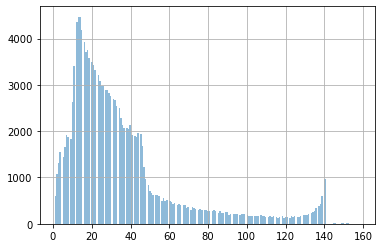

In [19]:
# 왜 str을 먼저 해줘야하는가 
# type이 없다.
print(train_data['document'].dtypes)
length = train_data['document'].astype(str).apply(len)
length.hist(bins = 200,alpha=0.5,label ='word')
print(np.percentile(length,50))

## 데이터 전처리


In [22]:
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [23]:
train_data['document'][:10]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
5        막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
6                                원작의 긴장감을 제대로 살려내지못했다.
7    별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...
8                               액션이 없는데도 재미 있는 몇안되는 영화
9        왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?
Name: document, dtype: object

In [64]:
def preprocessing(document):
    # 한글과 공백을 제외한 문자 제거
    stop_words= ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
    okt  = Okt()
    review = re.sub("[^가-힣ㄱ-하-ㅣ\\s]","",document)
#     print(review)
    #형태소 단위로 변경
    review = okt.morphs(review,stem =True) # 형태소 분석기를 사용해 어간 추출
#     print(review)

    review = [token for token in review if token not in stop_words]
    
    return review

from tqdm import tqdm
train_review ,test_review = [],[]
for review in tqdm(train_data['document']):
    if type(review)==str:
        train_review.append(preprocessing(review))
    else :
        train_review.append([])

for review in tqdm(test_data['document']):
    if type(review)==str:
        test_review.append(preprocessing(review))
    else :
        test_review.append([])


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [07:08<00:00, 116.69it/s]


## 토크나이징

In [65]:
tokenizer =  Tokenizer()
tokenizer.fit_on_texts(train_review)

train_seq =  tokenizer.texts_to_sequences(train_review)
test_seq =  tokenizer.texts_to_sequences(test_review)

word_vocab = tokenizer.word_index

max_length =27

train_inputs = pad_sequences(train_sequences,maxlen = max_length,padding='post')
train_labels = np.array(train_data['label'])
test_inputs = pad_sequences(test_sequences,maxlen = max_length, padding='post')
test_labels = np.array(test_data['label'])

NameError: name 'train_sequences' is not defined

In [ ]:
data_configs = {}
data_configs['vocab']  = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

import os
if not os.path.exists('data_in'):
    os.makedirs('data_in')
    
np.save(open('data_in/train_input.npy','wb'),train_inputs)
np.save(open('data_in/train_labels.npy','wb'),train_labels)
np.save(open('data_in/train_input.npy','wb'),test_inputs)
np.save(open('data_in/train_label.npy','wb'),test_labels)

json.dump(data_configs,open('data_in/data_configs.json','w'),ensure_ascii=False)